In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers,models,optimizers
import tensorflow as tf
from keras import regularizers
import os
import numpy as np

In [2]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import Adam, SGD
from keras.regularizers import l1, l2
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [3]:
input_shape = (84, 76, 3)
num_classes = 3

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 82, 74, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 72, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 36, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 40, 36, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 34, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 36, 32, 128)       147584    
                                                        

In [3]:
img_list = []
label_list = []
path_folder = 'C:/Facial Expression/Face Expressions (Happy, Sad, Surprise)/train'
for i, folder in enumerate(os.listdir(path_folder)):
    p = os.path.join(path_folder, folder)
    for image_name in os.listdir(p):
        q = os.path.join(p, image_name)
        load = image.load_img(q)
        load = load.resize((76, 84))
        img_arr = image.img_to_array(load)
        img_list.append(img_arr)
        label_list.append(i)

In [15]:
import numpy as np
import tensorflow as tf

img_test = []
label_test = []

path_folder = 'C:/Facial Expression/Face Expressions (Happy, Sad, Surprise)/test'
for i, folder in enumerate(os.listdir(path_folder)):
    p = os.path.join(path_folder, folder)
    for image_name in os.listdir(p):
        q = os.path.join(p, image_name)
        load = image.load_img(q)
        load = load.resize((76, 84))
        img_arr = image.img_to_array(load)
        img_test.append(img_arr)
        label_test.append(i)

In [16]:
num_class=3
val_img=np.array(img_test[::])
val_label=np.array(label_test[::])
val_encode=tf.keras.utils.to_categorical(val_label, num_class)

In [17]:
img_array = np.array(img_list)
label_array = np.array(label_list)

In [13]:
model=models.load_model('model7')
# opt = optimizers.Adam(learning_rate=0.001) 
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 82, 74, 64)        1792      
                                                                 
 conv2d_18 (Conv2D)          (None, 80, 72, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 40, 36, 64)       0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 40, 36, 64)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 38, 34, 128)       73856     
                                                                 
 conv2d_20 (Conv2D)          (None, 36, 32, 128)       147584    
                                                      

In [ ]:
label_array = np.clip(label_array, 0, num_class)
label_encoded = tf.keras.utils.to_categorical(label_array, num_class)
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(img_array, label_encoded,epochs=1,validation_data=(val_img, val_encode))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)
model.fit(datagen.flow(img_array, label_encoded, batch_size=32,
         subset='training'),
         validation_data=datagen.flow(val_img, val_encode,
         batch_size=8, subset='validation'),
         steps_per_epoch=len(img_array) / 32, epochs=3)
# model.fit(
#     augmented_images,
#     steps_per_epoch=len(img_array),  
#     epochs=10,
#     validation_data=(val_img, val_encode),

# )

In [18]:
img_test_array = np.array(img_test)
label_test = np.array(label_test)
label_test_array = np.clip(label_test, 0, num_class)
label_test_encoded = tf.keras.utils.to_categorical(label_test_array, num_class)

In [19]:
predicted_labels = model.predict(img_test_array)
predicted_classes = np.argmax(predicted_labels, axis=1)
true_labels = tf.keras.utils.to_categorical(label_test_array, num_class)
test_accuracy = np.mean(np.equal(np.argmax(true_labels, axis=1), predicted_classes))
print('Test Accuracy:',test_accuracy)

9/9 [==============================] - 4s 353ms/step
Test Accuracy: 0.8007518796992481


In [20]:
predicted_labels = model.predict(img_array)
predicted_classes = np.argmax(predicted_labels, axis=1)
true_labels = tf.keras.utils.to_categorical(label_array, num_class)
test_accuracy = np.mean(np.equal(np.argmax(true_labels, axis=1), predicted_classes))
print('Test Accuracy:', test_accuracy)

107/107 [==============================] - 56s 528ms/step
Test Accuracy: 0.9494595384165936


In [44]:
model.save('model7')

INFO:tensorflow:Assets written to: model7\assets


INFO:tensorflow:Assets written to: model7\assets


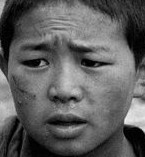

In [32]:
load=image.load_img('C:/Facial Expression/Face Expressions (Happy, Sad, Surprise)/test/sad/sad (7).jpg')
load

In [35]:
load = image.load_img(q)
load = load.resize((76, 84))
img = image.img_to_array(load)
img=img_list[2000]
img = np.expand_dims(img, axis=0)
img=np.array(img)
predictions=model.predict(img)
class_labels = ['Happy', 'Sad', 'Surprise']
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]
print("Predicted class: ", predicted_class_label)
predicted_class_index

1/1 [==============================] - 0s 65ms/step
Predicted class:  Sad


1